In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#creating dictionaries for respective functions to use
functions = {'sin': lambda t: np.sin(np.sqrt(2)*t),'cos': lambda t: np.cos(t), 'cos3': lambda t: np.cos(0.86*t)**3, 'chirp': lambda t: np.cos(16*t*(1.5+t/(2*np.pi)))}
get_title = {'sin':'Spectrum of sin(sqrt(2)*t)','cos': 'Spectrum of cos(t)', 'cos3': 'Spectrum of cos^3(0.86t)', 'chirp': 'Spectrum of cos(16*t*(1.5+t/(2*np.pi)))'}

In [18]:
#define a function to find the fft of a non periodic function
def find_fft_np(func, N=512, t_lim_1=-np.pi, t_lim_2=np.pi, windowing=True, x_limit=8, plot=True):
    '''Function to find the fft of a non periodic function. Returns the fft and the frequency array as : (fft,freqs)
    
    args :
        func :
            function key in the functions dictionary
        N : 
            number of samples
        t_lim_1,t_lim_2 : 
            range in time domain
        x_limit : 
            frequency limit for the plot
        plot : 
            Boolean to specify plotting of the magnitude and phase of the fft
        windowing :
            Boolean to specify usage of Hamming window
    '''    
    t=np.linspace(t_lim_1,t_lim_2,N+1);t=t[:-1] #creating the time vector
    dt=t[1]-t[0];fmax=1/dt #calculating the time step and the maximum frequency
    wnd = 1

    if windowing == True:
        n=np.arange(N)
        wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/(N-1)))
    
    y=functions[func](t) #calculating the function
    y=y*wnd #applying the windowing
    y[0]=0  #setting the first value to zero


    y=np.fft.fftshift(y) 
    Y=np.fft.fftshift(np.fft.fft(y))/float(N) 
    w=np.linspace(-np.pi*fmax,np.pi*fmax,N+1);w=w[:-1]
    if plot == True:
        plt.figure()
        plt.subplot(2,1,1)
        plt.plot(w,abs(Y),'-bo',lw=2)
        plt.xlim([-x_limit,x_limit])
        plt.ylabel(r"$|Y|$",size=16)
        plt.title(get_title[func])
        plt.grid(True)
        plt.subplot(2,1,2)
        plt.plot(w,np.angle(Y),'ro',lw=2)
        plt.xlim([-x_limit,x_limit])
        plt.ylabel(r"$\angle Y$",size=16)
        plt.xlabel(r"$\omega$",size=16)
        plt.grid(True)
        plt.show()
    return Y,w

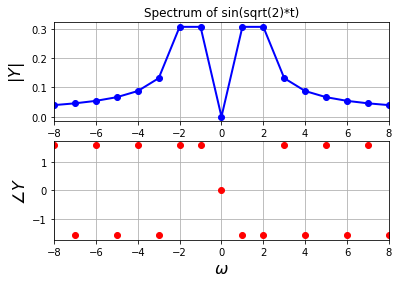

In [19]:
Y, w = find_fft_np('sin',N=512,t_lim_1=-np.pi,t_lim_2=np.pi,windowing=False)

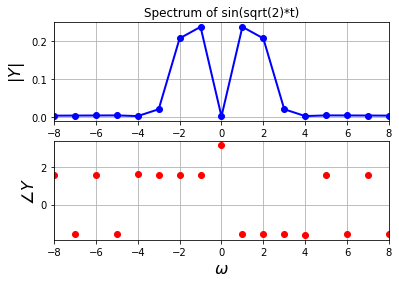

In [20]:
Y, w = find_fft_np('sin',N=512,t_lim_1=-np.pi,t_lim_2=np.pi,windowing=True,x_limit=8,plot=True)

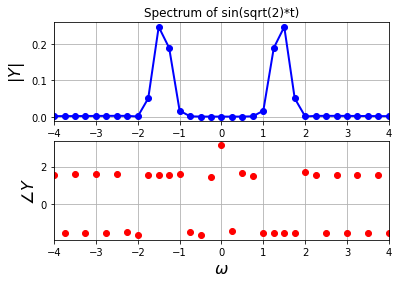

In [21]:
Y, w = find_fft_np('sin',N=512,t_lim_1=-4*np.pi,t_lim_2=4*np.pi,windowing=True,x_limit=4,plot=True)

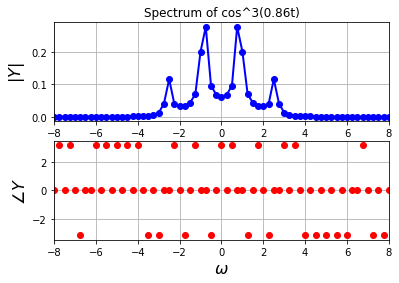

In [22]:
Y, w = find_fft_np('cos3',N=512,t_lim_1=-4*np.pi,t_lim_2=4*np.pi,windowing=False)


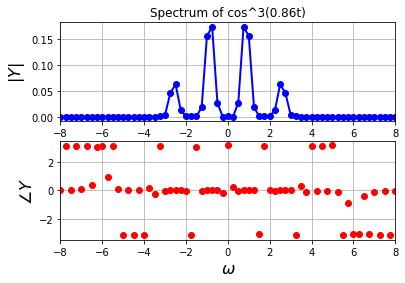

In [23]:
Y, w = find_fft_np('cos3',N=512,t_lim_1=-4*np.pi,t_lim_2=4*np.pi,windowing=True)

In [24]:
#Assumptions
w0 = 1.5
delta = np.pi/2


In [25]:
def cos1(t, w0 = 1.5, delta = np.pi/2):
    return np.cos(w0*t+delta)
functions['cos1'] = cos1
get_title['cos1'] = 'Spectrum of cos(1.5*t+pi/2)'

In [26]:
def cos_withnoise(t, w0 = 1.5, delta = np.pi/2, A = 0.1):
    return np.cos(w0*t+delta)+A*np.random.randn(len(t))
functions['cos_withnoise'] = cos_withnoise
get_title['cos_withnoise'] = 'Spectrum of cos(1.5*t+pi/2) with white Gaussian noise'

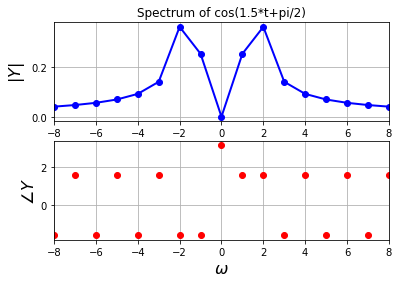

Calculated value of w0 without noise:  1.5680780691214378
Calculated value of delta without noise:  1.5809013411813007


In [27]:
#Question 3
t = np.linspace(-np.pi,np.pi,128+1);t=t[:-1]

#Assuming w0 = 1.25 and delta = pi/2
y = functions['cos1'](t,1.5,np.pi/2)

dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(128)
wnd = np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/(128-1)))
y = y*wnd
y[0] = 0
y = np.fft.fftshift(y)
Y = np.fft.fftshift(np.fft.fft(y))/128
w = np.linspace(-np.pi*fmax,np.pi*fmax,128+1);w=w[:-1]
find_fft_np('cos1',N=128,t_lim_1=-np.pi,t_lim_2=np.pi,windowing=False)

ii = np.where(w>=0)
p = 1.7
w_cal = sum(abs(Y[ii])**p*w[ii])/sum(abs(Y[ii])**p)
i = abs(w-w_cal).argmin()
delta = np.angle(Y[i])
print("Calculated value of w0 without noise: ",w_cal)
print("Calculated value of delta without noise: ",delta)




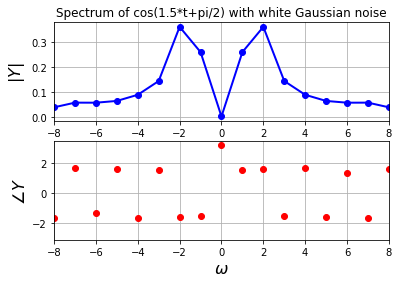

Calculated value of w0 with noise:  1.5816706179194049
Calculated value of delta with noise:  1.5754215868389858


In [28]:
#Question 3
t = np.linspace(-np.pi,np.pi,128+1);t=t[:-1]

#Assuming w0 = 1.25 and delta = pi/2
y = functions['cos_withnoise'](t,1.5,np.pi/2)

dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(128)
wnd = np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/(128-1)))
y = y*wnd
y[0] = 0
y = np.fft.fftshift(y)
Y = np.fft.fftshift(np.fft.fft(y))/128
w = np.linspace(-np.pi*fmax,np.pi*fmax,128+1);w=w[:-1]
find_fft_np('cos_withnoise',N=128,t_lim_1=-np.pi,t_lim_2=np.pi,windowing=False)

ii = np.where(w>=0)
p = 2.4
w_cal = sum(abs(Y[ii])**p*w[ii])/sum(abs(Y[ii])**p)
i = abs(w-w_cal).argmin()
delta = np.angle(Y[i])
print("Calculated value of w0 with noise: ",w_cal)
print("Calculated value of delta with noise: ",delta)




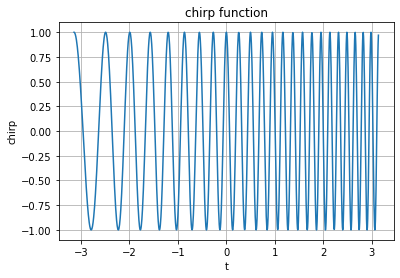

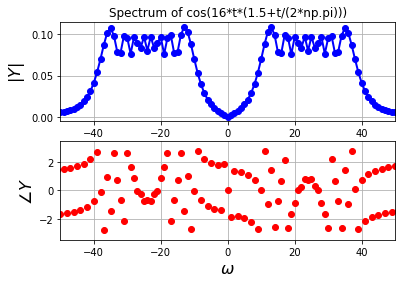

(array([-0.00097656+0.00000000e+00j,  0.00097656+2.18859968e-08j,
        -0.00097656-4.37736613e-08j, ...,  0.00097656-6.56646613e-08j,
        -0.00097656+4.37736613e-08j,  0.00097656-2.18859968e-08j]),
 array([-512., -511., -510., ...,  509.,  510.,  511.]))

In [29]:
t = np.linspace(-np.pi,np.pi,1024+1);t=t[:-1]
chirp = functions['chirp'](t)
#plotting chirp function
plt.figure()
plt.plot(t,chirp)
plt.xlabel('t')
plt.ylabel('chirp')
plt.title('chirp function')
plt.grid(True)
plt.show()
find_fft_np('chirp', N=1024, t_lim_1=-np.pi, t_lim_2=np.pi,windowing=False, x_limit = 50)


/var/folders/4g/21pcmcbn6gv5s9dnc62dlgd40000gn/T/ipykernel_3849/787497333.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


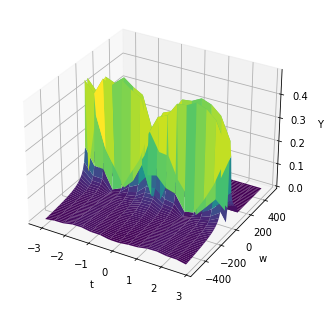

In [30]:
t = np.linspace(-np.pi,np.pi,1024+1);t=t[:-1]
#split t into 16 arrays of length 64
t_split = np.array_split(t,16)
Y = []
for t in t_split:
    Y.append(find_fft_np('chirp', N=64, t_lim_1=t[0], t_lim_2=t[-1], windowing=False, x_limit = 50, plot = False)[0])
Y = np.array(Y)

t1 = np.linspace(-np.pi,np.pi,16+1);t1=t1[:-1]
dt = t[1] - t[0]
fmax = 1/dt
w = np.linspace(-np.pi*fmax,np.pi*fmax,64+1);w=w[:-1]
Y1 = Y.copy()
indices = np.where(w>150)
Y1[:,indices] = 0

#plotting surface plot
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure()
ax = p3.Axes3D(fig)
t1, w = np.meshgrid(t1,w)
ax.plot_surface(t1, w, abs(Y1.T), rstride = 1, cstride = 1, cmap=plt.cm.viridis)
ax.set_xlabel('t')
ax.set_ylabel('w')
ax.set_zlabel('Y')
plt.show()
